In [1]:
import pandas as pd

In [ ]:
P_1 = pd.read_csv('c:/Users/marti/Downloads/vscode ml proj/Plant_1_Generation_Data.csv')
P_2 = pd.read_csv('c:/Users/marti/Downloads/vscode ml proj/Plant_2_Generation_Data.csv')
W_1 = pd.read_csv('c:/Users/marti/Downloads/vscode ml proj/Plant_1_Weather_Sensor_Data.csv')
W_2 = pd.read_csv('c:/Users/marti/Downloads/vscode ml proj/Plant_2_Weather_Sensor_Data.csv')
P_1.head()


FileNotFoundError: [Errno 2] No such file or directory: 'c:/Users/marti/Downloads/vscode ml proj/Plant_1_Generation_Data.csv'

In [4]:
#Martin
#Martin
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/ml_projekt/Project')

Mounted at /content/drive


In [14]:
P_1 = pd.read_csv('Plant_1_Generation_Data.csv')
P_2 = pd.read_csv('Plant_2_Generation_Data.csv')
W_1 = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
W_2 = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')


In [ ]:
P_1.head()
print(P_1['DATE_TIME'].dtype)
P_1['DATE_TIME'] = pd.to_datetime(P_1['DATE_TIME'])
P_2['DATE_TIME'] = pd.to_datetime(P_2['DATE_TIME'])
W_1['DATE_TIME'] = pd.to_datetime(W_1['DATE_TIME'])
W_2['DATE_TIME'] = pd.to_datetime(W_2['DATE_TIME'])



In [ ]:
W_1.head()

In [6]:
P_1

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


<ipython-input-7-47a32fd9bc1f>:5: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  P_1['DATE_TIME'] = pd.to_datetime(P_1['DATE_TIME'])


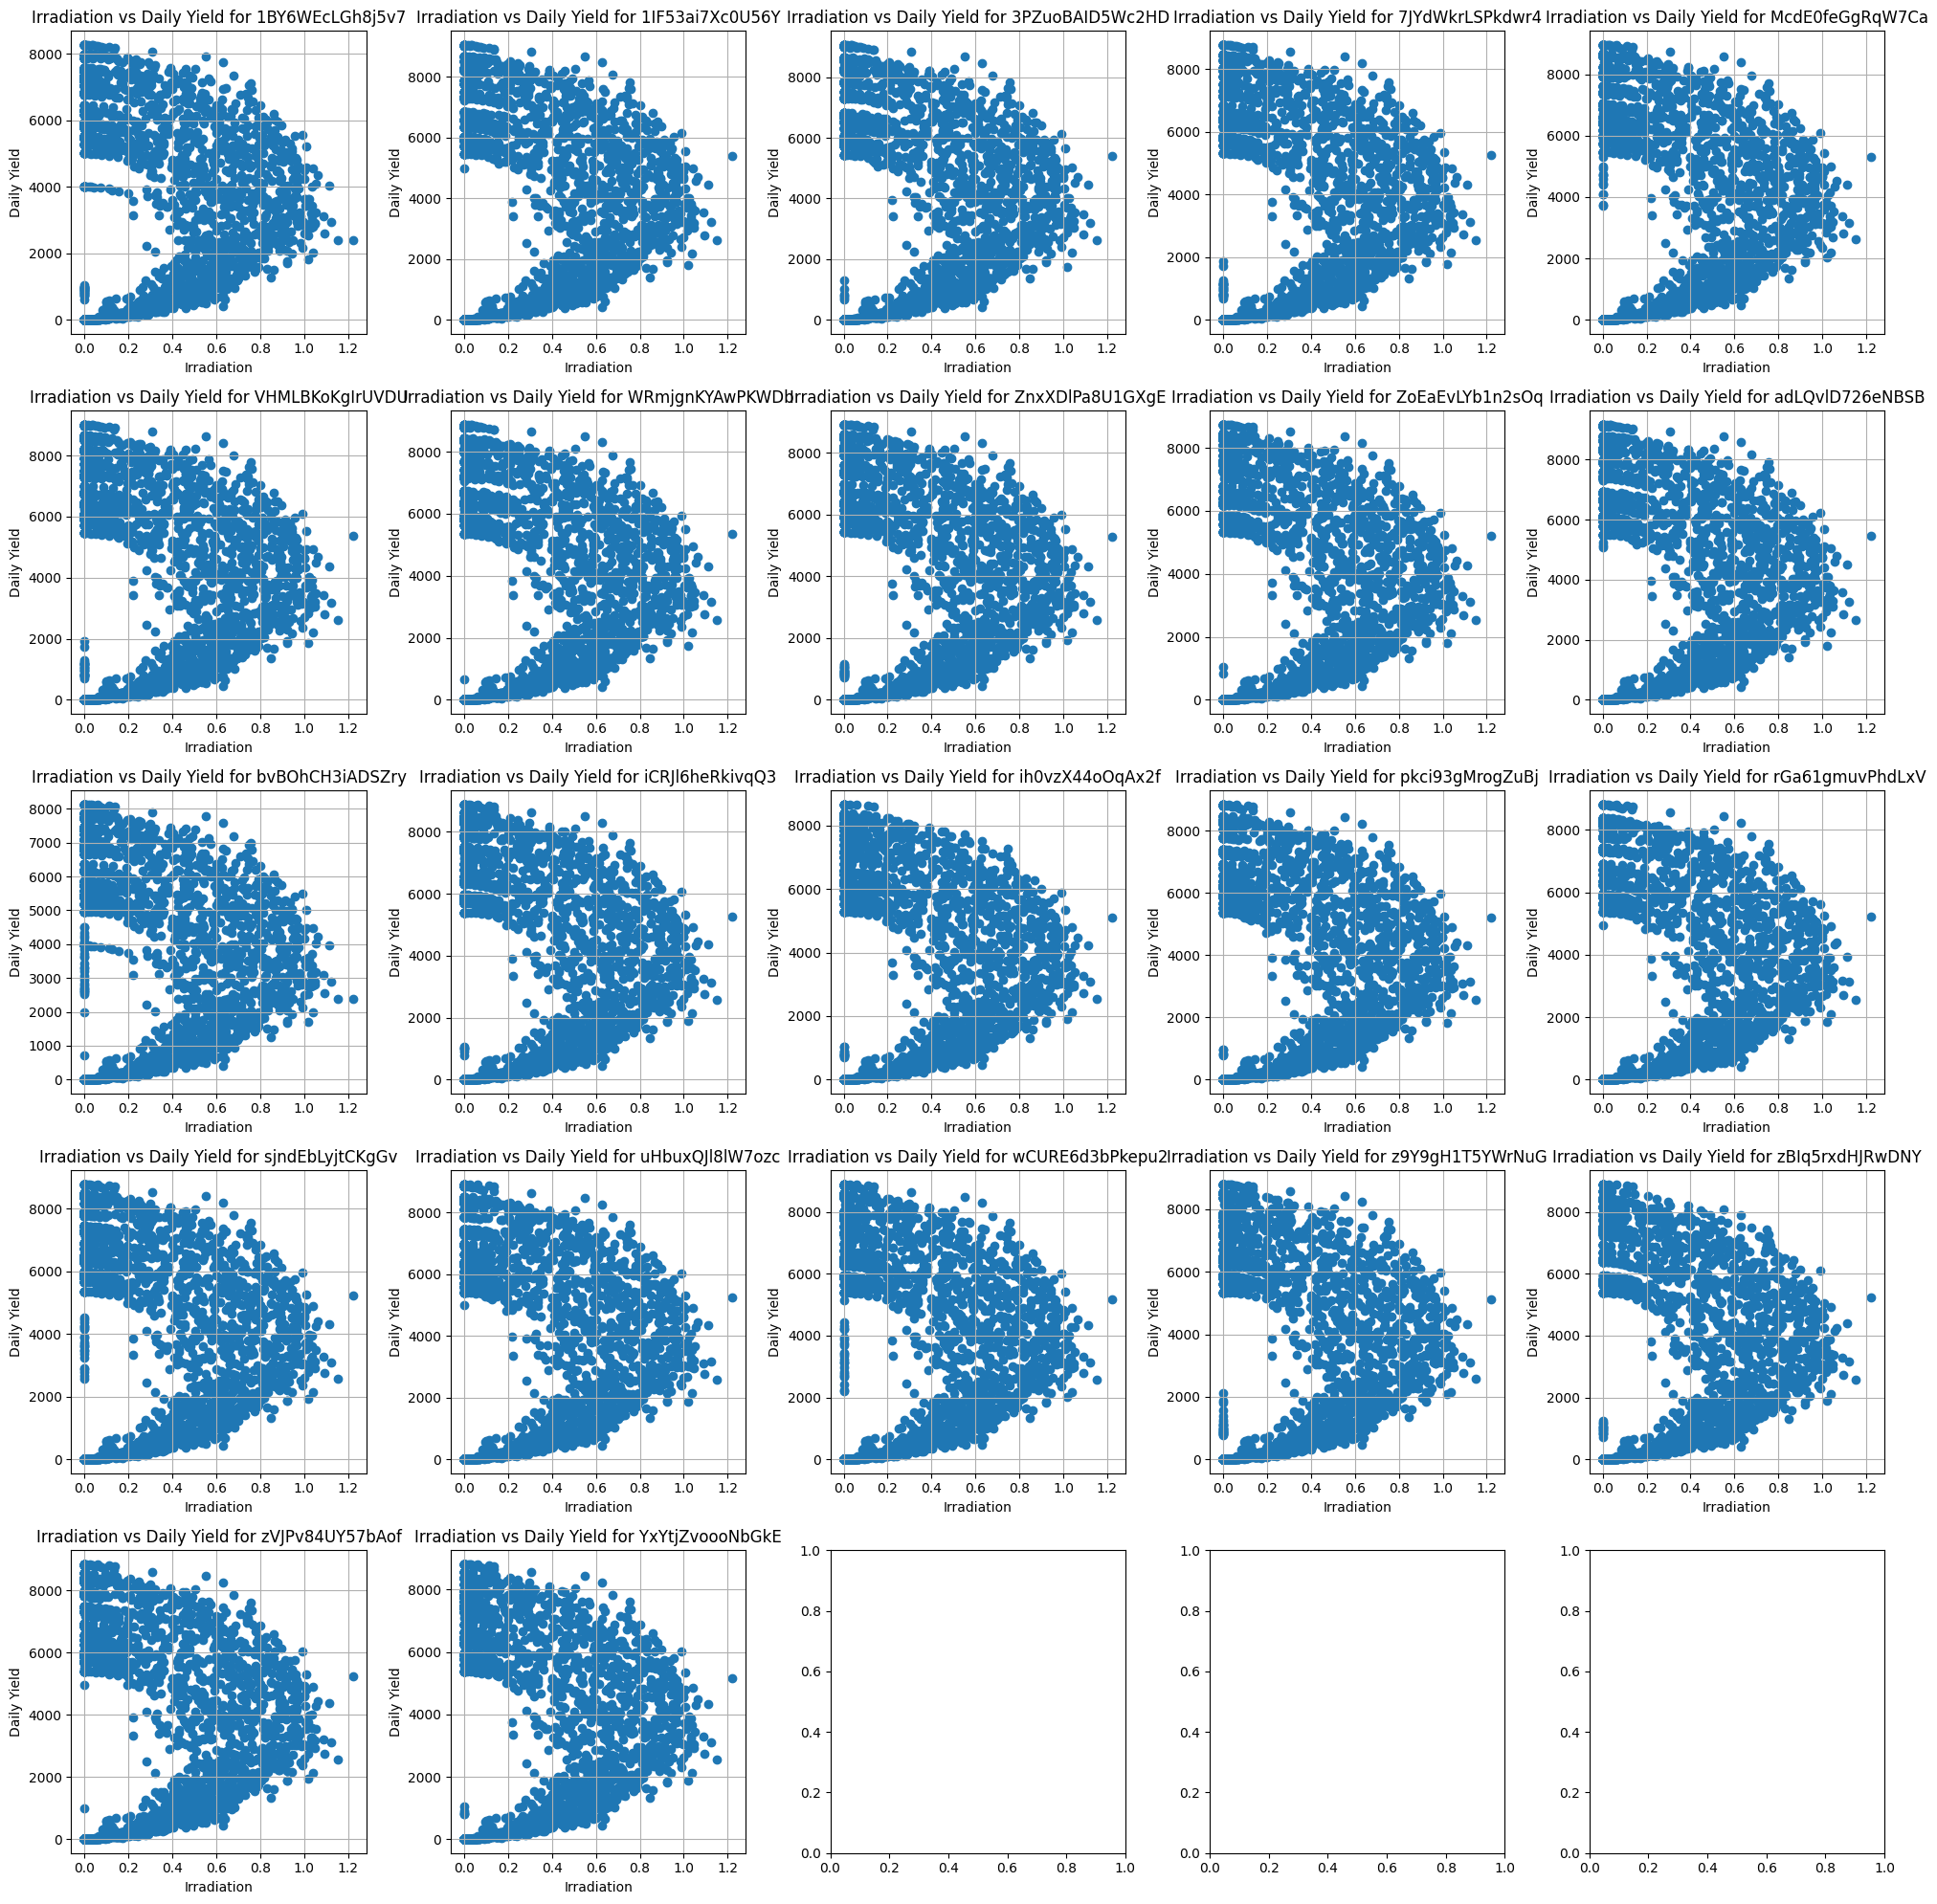

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure both DATE_TIME columns are in the same format and data type
P_1['DATE_TIME'] = pd.to_datetime(P_1['DATE_TIME'])
W_1['DATE_TIME'] = pd.to_datetime(W_1['DATE_TIME'])

# Merge P_1 and W_1 on DATE_TIME, keeping all rows from P_1
merged_df = pd.merge(P_1, W_1, on=['DATE_TIME'], how='inner')

# Create a figure and axes for the grid
fig, axes = plt.subplots(5, 5, figsize=(20, 20))  # Adjust figsize as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through source keys and plot on the grid
for i, source_key in enumerate(merged_df['SOURCE_KEY_x'].unique()):
    df_filtered = merged_df[merged_df['SOURCE_KEY_x'] == source_key]
    axes[i].scatter(df_filtered['IRRADIATION'], df_filtered['DAILY_YIELD'])
    axes[i].set_title(f'Irradiation vs Daily Yield for {source_key}')
    axes[i].set_xlabel('Irradiation')
    axes[i].set_ylabel('Daily Yield')
    axes[i].grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [8]:
P_1['DC_POWER'] = P_1['DC_POWER'] / 10

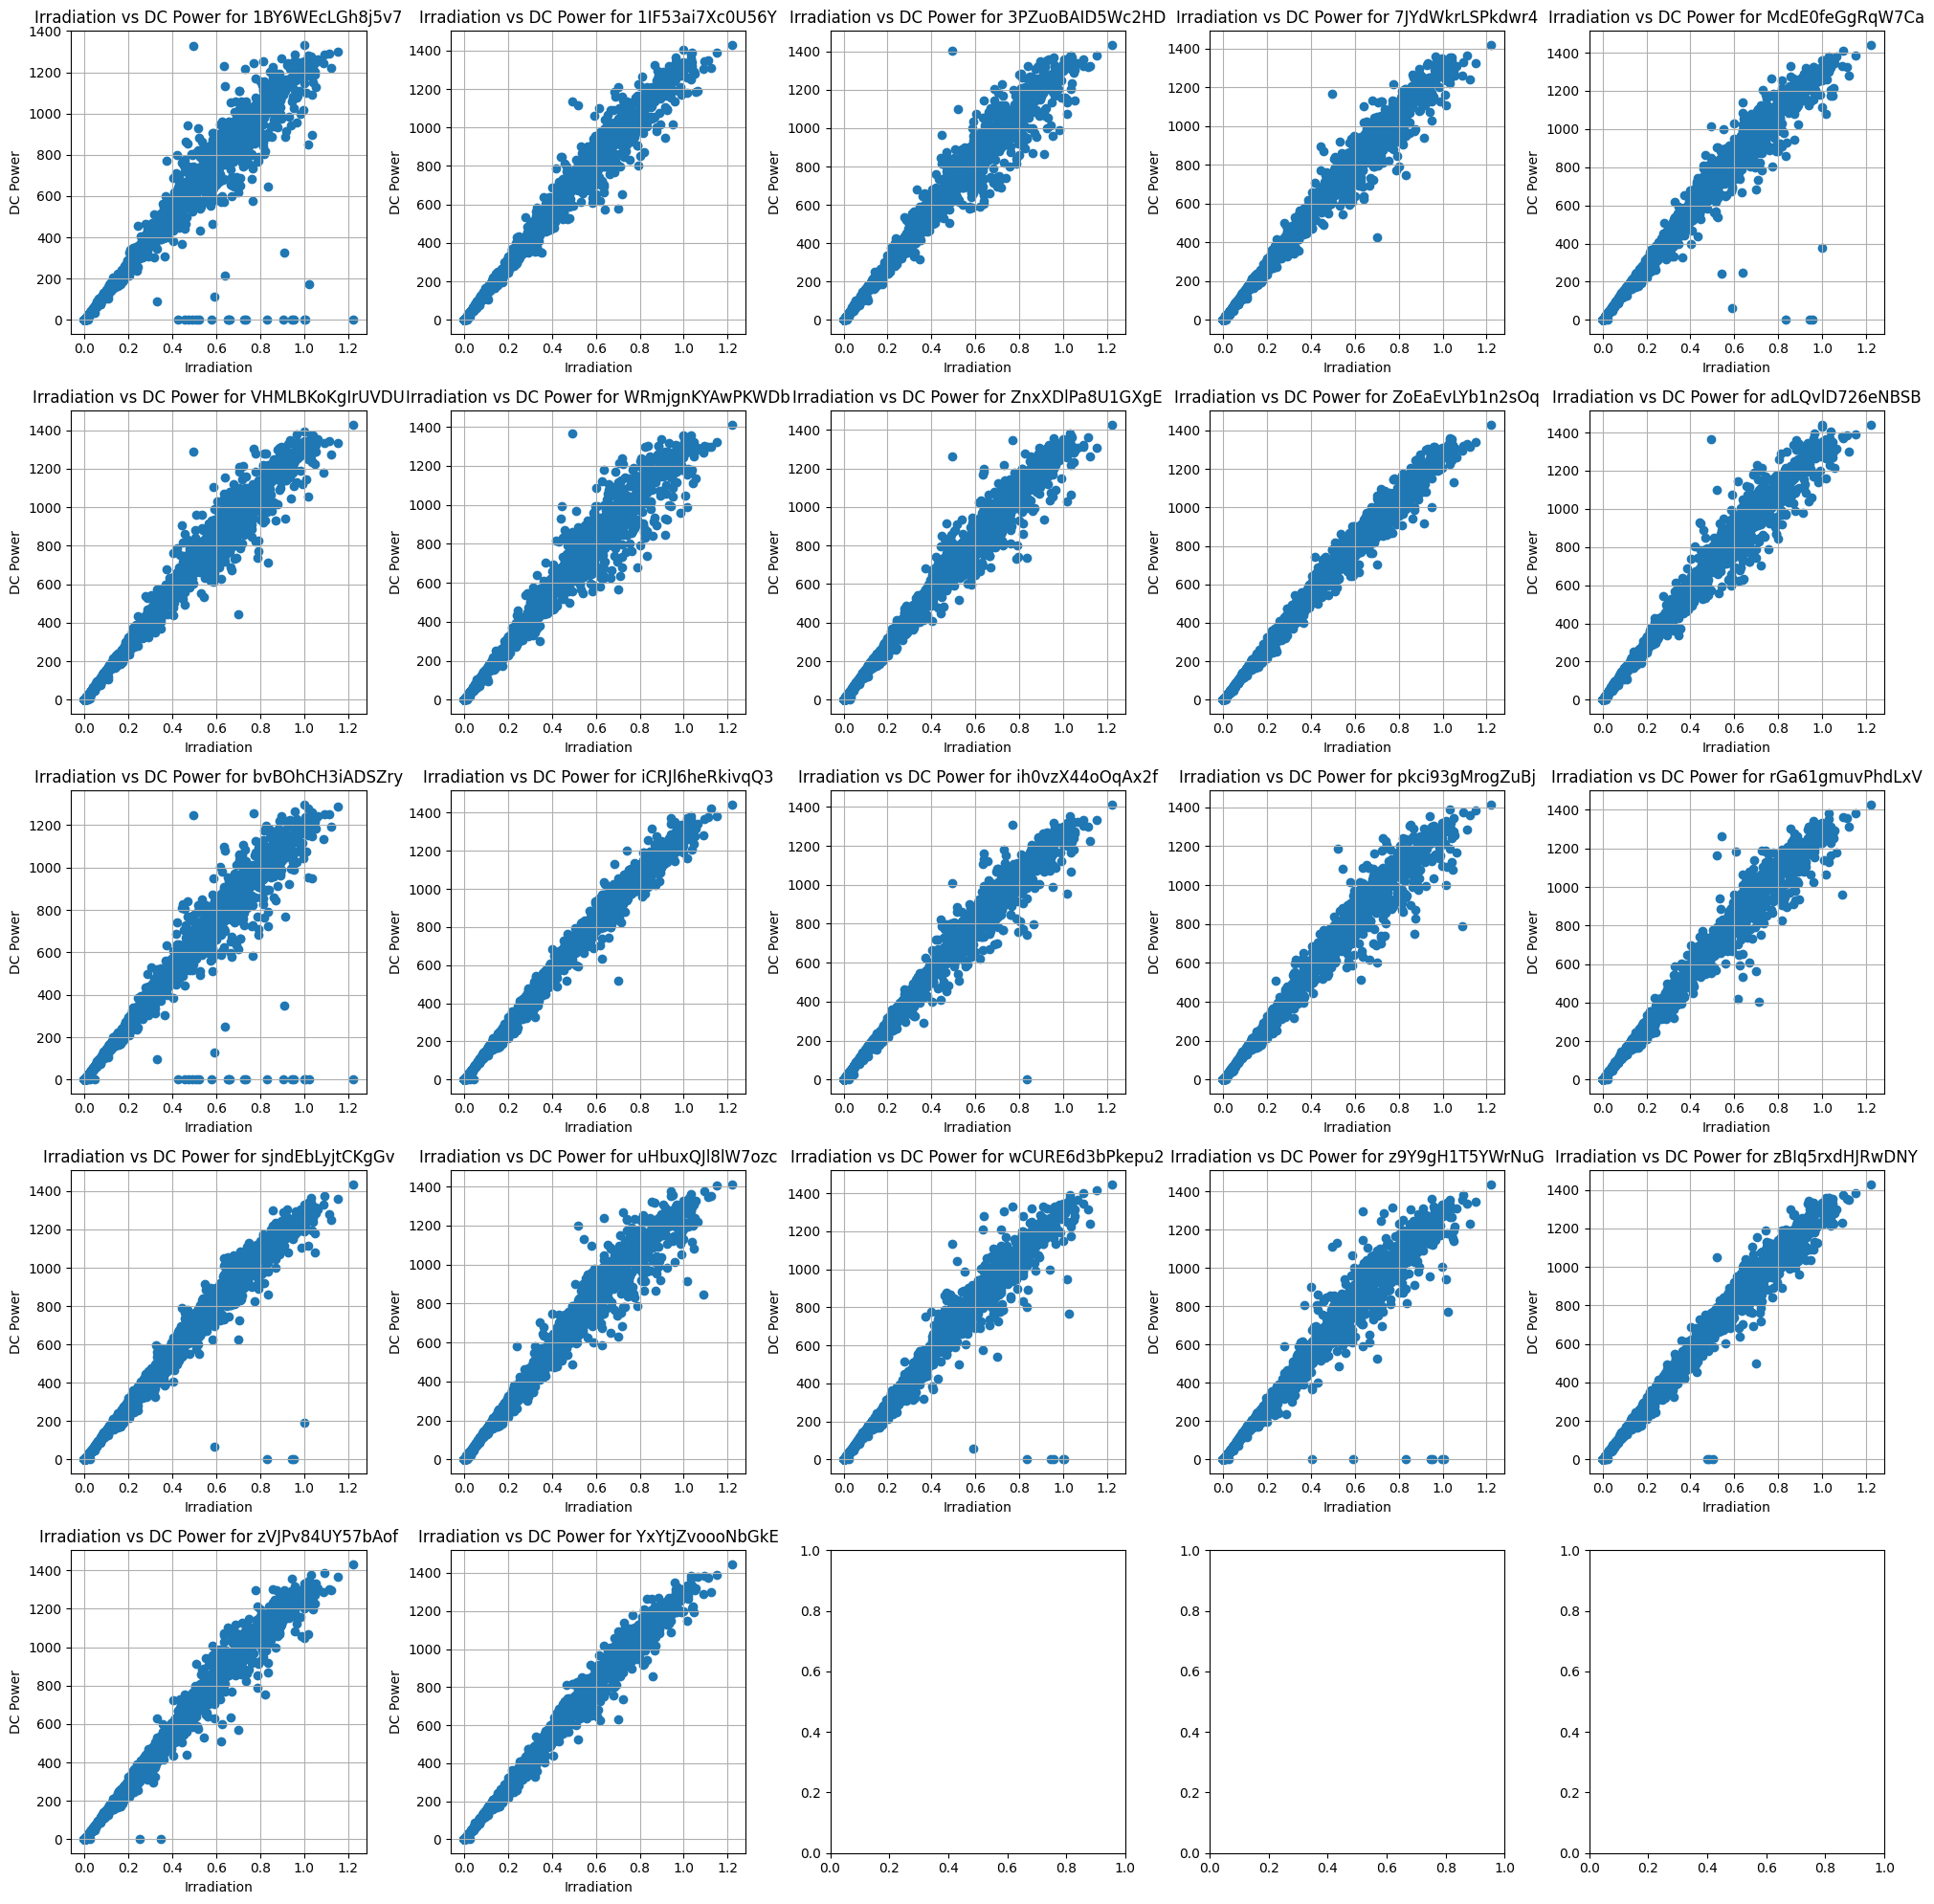

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure both DATE_TIME columns are in the same format and data type
P_1['DATE_TIME'] = pd.to_datetime(P_1['DATE_TIME'])
W_1['DATE_TIME'] = pd.to_datetime(W_1['DATE_TIME'])

# Merge P_1 and W_1 on DATE_TIME, keeping all rows from P_1
merged_df = pd.merge(P_1, W_1, on=['DATE_TIME'], how='inner')

for source_key in merged_df['SOURCE_KEY_x'].unique():
    # Filter data for the current source key
    df_filtered = merged_df[merged_df['SOURCE_KEY_x'] == source_key]
# Create a figure and axes for the grid
fig, axes = plt.subplots(5, 5, figsize=(20, 20))  # Adjust figsize as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through source keys and plot on the grid
for i, source_key in enumerate(merged_df['SOURCE_KEY_x'].unique()):
    df_filtered = merged_df[merged_df['SOURCE_KEY_x'] == source_key]
    axes[i].scatter(df_filtered['IRRADIATION'], df_filtered['DC_POWER'])
    axes[i].set_title(f'Irradiation vs DC Power for {source_key}')
    axes[i].set_xlabel('Irradiation')
    axes[i].set_ylabel('DC Power')
    axes[i].grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Mean Absolute Error: 91.99130720457475
R-squared: 0.9217558211151377


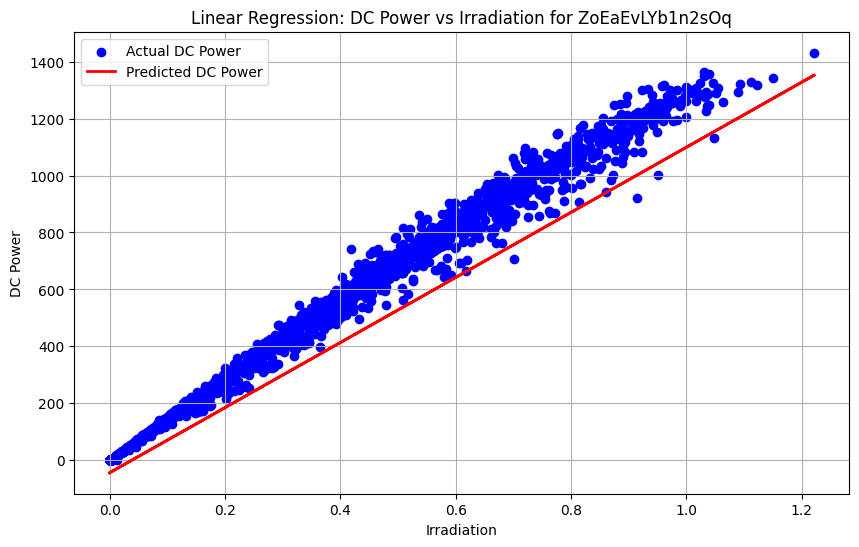

Mean DC Power: 313.90098081933945
Slope of the linear regression model: 1142.969728583904


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Filter data for the given source key
source_key = 'ZoEaEvLYb1n2sOq'
df_filtered = merged_df[merged_df['SOURCE_KEY_x'] == source_key]

# Prepare the data for regression
X = df_filtered[['IRRADIATION']].values
y = df_filtered['DC_POWER'].values

# Train a linear regression model
linrmodel_bestinverter = LinearRegression()
linrmodel_bestinverter.fit(X, y)
linrmodel_bestinverter.intercept_-=50
linrmodel_bestinverter.coef_[0]-=180

# Predict on the same data
y_pred = linrmodel_bestinverter.predict(X)

# Evaluate the model
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual DC Power')
plt.plot(X, y_pred, color='red', linewidth=2, label='Predicted DC Power')
plt.title(f'Linear Regression: DC Power vs Irradiation for {source_key}')
plt.xlabel('Irradiation')
plt.ylabel('DC Power')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the mean and slope of the linear regression model
mean_dc_power = df_filtered['DC_POWER'].mean()
slope = linrmodel_bestinverter.coef_[0]

print(f"Mean DC Power: {mean_dc_power}")
print(f"Slope of the linear regression model: {slope}")


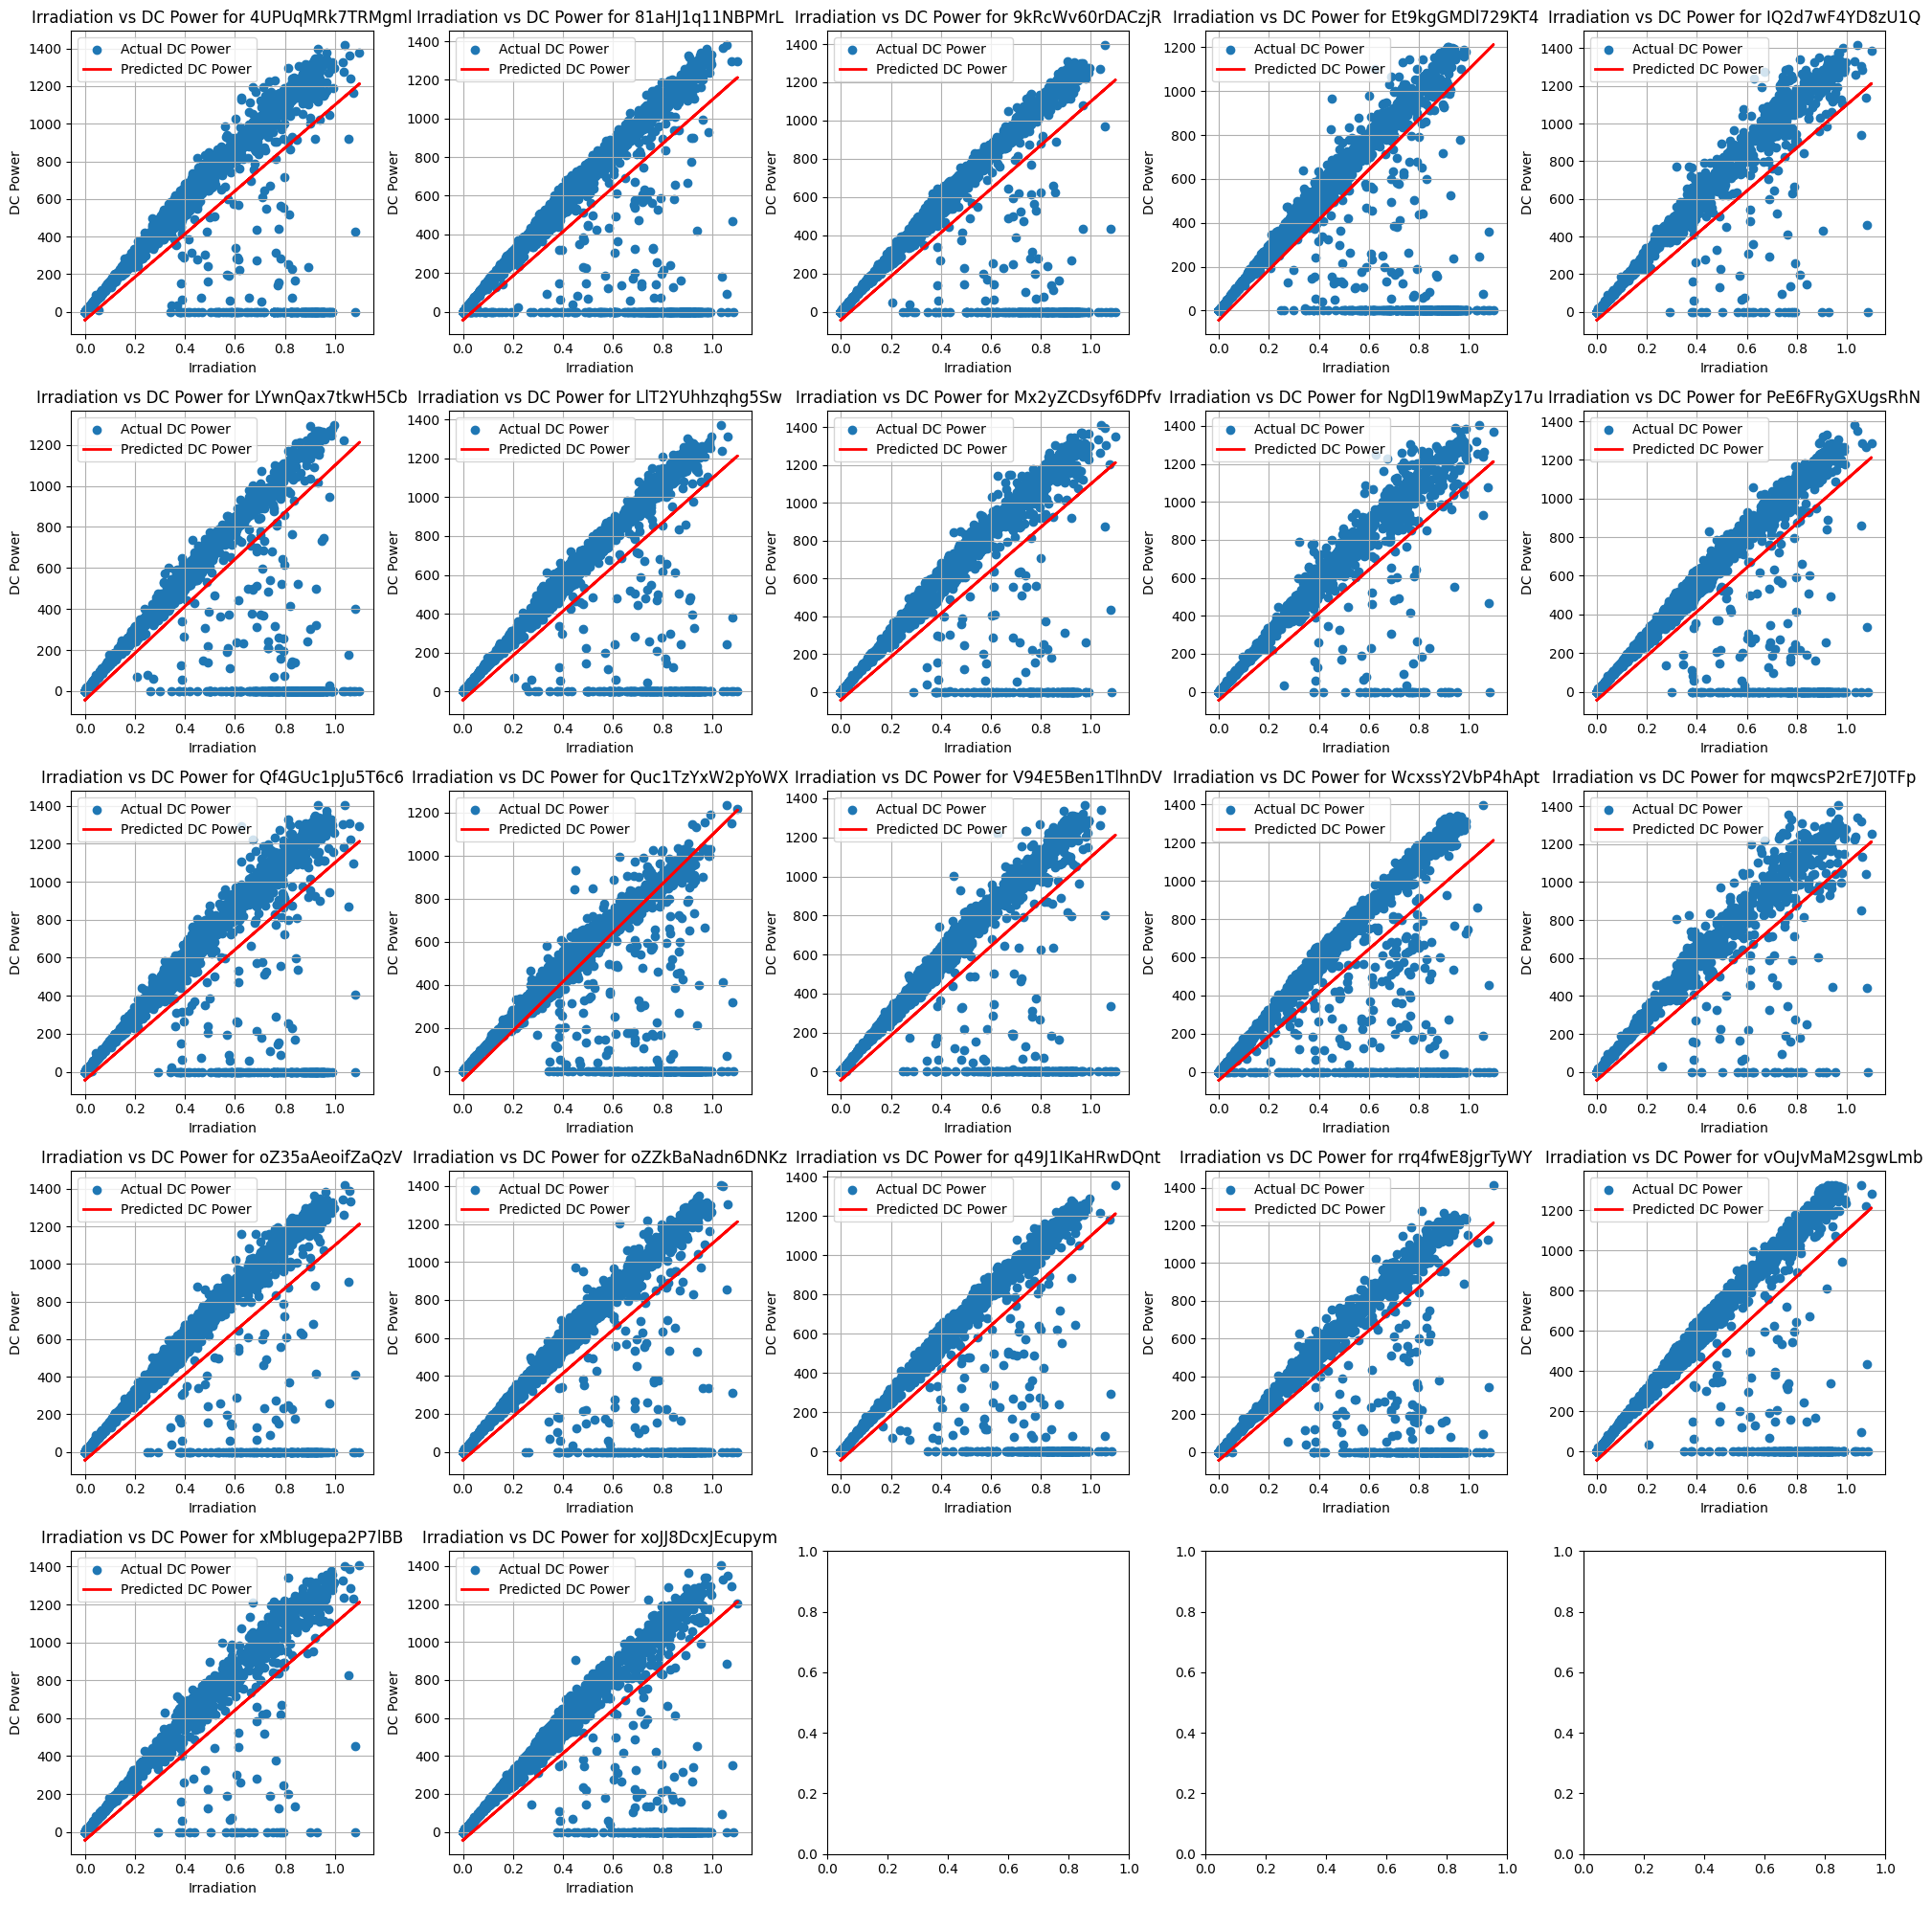

In [11]:
# Ensure both DATE_TIME columns are in the same format and data type
P_2['DATE_TIME'] = pd.to_datetime(P_2['DATE_TIME'])
W_2['DATE_TIME'] = pd.to_datetime(W_2['DATE_TIME'])

# Merge P_2 and W_2 on DATE_TIME, keeping all rows from P_2
merged_df_2 = pd.merge(P_2, W_2, on=['DATE_TIME'], how='inner')

# Create a figure and axes for the grid
fig, axes = plt.subplots(5, 5, figsize=(20, 20))  # Adjust figsize as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through source keys and plot on the grid
for i, source_key in enumerate(merged_df_2['SOURCE_KEY_x'].unique()):
    df_filtered = merged_df_2[merged_df_2['SOURCE_KEY_x'] == source_key]
    X = df_filtered[['IRRADIATION']].values
    y = df_filtered['DC_POWER'].values

    # Predict using linrmodel_bestinverter
    y_pred = linrmodel_bestinverter.predict(X)

    axes[i].scatter(df_filtered['IRRADIATION'], df_filtered['DC_POWER'], label='Actual DC Power')
    axes[i].plot(X, y_pred, color='red', linewidth=2, label='Predicted DC Power')
    axes[i].set_title(f'Irradiation vs DC Power for {source_key}')
    axes[i].set_xlabel('Irradiation')
    axes[i].set_ylabel('DC Power')
    axes[i].grid(True)
    axes[i].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [12]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from scipy.stats import zscore

def find_anomalous_days(df, source_key, model=linrmodel_bestinverter, z_threshold=7):
    # Filter data for the given source key
    df_filtered = df[df['SOURCE_KEY_x'] == source_key].copy()

    # Prepare the data for regression
    X = df_filtered[['IRRADIATION']].values
    y = df_filtered['DC_POWER'].values

    # Predict the expected DC_POWER using the provided model
    df_filtered['Expected_DC_POWER'] = model.predict(X)

    # Calculate residuals
    df_filtered['Residuals'] = df_filtered['DC_POWER'] - df_filtered['Expected_DC_POWER']

    # Calculate Z-scores for residuals
    df_filtered['Z_Score'] = zscore(df_filtered['Residuals'])

    # Identify significant outliers
    df_filtered['Outlier'] = df_filtered['Z_Score'].abs() > z_threshold

    # Find the days with significant outliers
    df_filtered['DATE'] = df_filtered['DATE_TIME'].dt.date
    anomalous_days = df_filtered[df_filtered['Outlier']].groupby('DATE').size().index

    return anomalous_days

# Example usage
source_key = 'ZoEaEvLYb1n2sOq'
anomalous_days = find_anomalous_days(merged_df, source_key)
print(f"Days with anomalies for inverter {source_key}: {anomalous_days}")

Days with anomalies for inverter ZoEaEvLYb1n2sOq: Index([], dtype='object', name='DATE')


In [13]:
from sklearn.metrics import mean_squared_error

def find_anomalous_days(df, source_key, model=linrmodel_bestinverter, mse_threshold=0.3):
    # Filter data for the given source key
    df_filtered = df[df['SOURCE_KEY_x'] == source_key].copy()

    # Prepare the data for regression
    X = df_filtered[['IRRADIATION']].values
    y = df_filtered['DC_POWER'].values

    # Predict the expected DC_POWER using the provided model
    df_filtered['Expected_DC_POWER'] = model.predict(X)

    # Calculate the mean squared error for each day
    df_filtered['DATE'] = df_filtered['DATE_TIME'].dt.date
    daily_mse = df_filtered.groupby('DATE').apply(lambda x: mean_squared_error(x['DC_POWER'], x['Expected_DC_POWER']))

    # Find the days with MSE below the threshold
    anomalous_days = daily_mse[daily_mse < mse_threshold].index

    return anomalous_days

# Example usage
source_key = 'ZoEaEvLYb1n2sOq'
anomalous_days = find_anomalous_days(merged_df, source_key)
print(f"Days with anomalies for inverter {source_key}: {anomalous_days}")


Days with anomalies for inverter ZoEaEvLYb1n2sOq: Index([], dtype='object', name='DATE')


<ipython-input-13-d33752ff8bf1>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily_mse = df_filtered.groupby('DATE').apply(lambda x: mean_squared_error(x['DC_POWER'], x['Expected_DC_POWER']))


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Function to find days with poor performance for a given source key
def find_poor_performance_days(df, source_key):
    # Filter data for the given source key
    df_filtered = df[df['SOURCE_KEY_x'] == source_key].copy()

    # Prepare the data for regression
    X = df_filtered[['IRRADIATION']].values
    y = df_filtered['DC_POWER'].values

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict the expected DC_POWER
    df_filtered.loc[:, 'Expected_DC_POWER'] = model.predict(X)

    # Calculate the difference between actual and expected DC_POWER
    df_filtered.loc[:, 'Performance_Diff'] = df_filtered['Expected_DC_POWER'] - df_filtered['DC_POWER']

    # Define a threshold for poor performance (e.g., actual DC_POWER is 20% lower than expected)
    threshold = 0.2
    df_filtered.loc[:, 'Poor_Performance'] = df_filtered['Performance_Diff'] > (threshold * df_filtered['Expected_DC_POWER'])

    # Find the days with poor performance
    poor_performance_days = df_filtered.loc[df_filtered['Poor_Performance'], 'DATE_TIME'].dt.date.unique()

    return poor_performance_days

# Example usage
source_key = 'ZoEaEvLYb1n2sOq'
poor_performance_days = find_poor_performance_days(merged_df, source_key)
print(f"Days with poor performance for inverter {source_key}: {poor_performance_days}")

# Plotting irradiation vs DC power for poor performance days
rows, cols = 7, 5
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
axes = axes.flatten()

for i, day in enumerate(poor_performance_days):
    day_data = merged_df[(merged_df['DATE_TIME'].dt.date == day) & (merged_df['SOURCE_KEY_x'] == source_key)]
    axes[i].scatter(day_data['IRRADIATION'], day_data['DC_POWER'])
    axes[i].set_title(f'{day}')
    axes[i].set_xlabel('Irradiation')
    axes[i].set_ylabel('DC Power')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
merged_df_2.head()

In [ ]:
P_1.head()

In [ ]:


average_dc_power = P_1['DC_POWER'].mean()
print(f"The average DC power in P_1 is: {average_dc_power}")

Given the nature of your data (solar power plant generation data), you might be interested in predicting the power generation based on weather conditions. This is a regression problem where you want to predict a continuous value (power generation) based on features like ambient temperature, module temperature, and irradiation.

Step-by-Step Plan
Data Preprocessing:

Load the CSV files.
Merge weather data with generation data based on the timestamp.
Handle missing values and outliers.
Feature engineering (e.g., creating new features like time of day, day of the week).
Exploratory Data Analysis (EDA):

Visualize the data to understand relationships between features and the target variable.
Check for correlations.
Model Selection:

Split the data into training and testing sets.
Choose regression algorithms to try (e.g., Linear Regression, Decision Tree Regressor, Random Forest Regressor, Gradient Boosting Regressor).
Model Training and Evaluation:

Train the models on the training set.
Evaluate the models using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.
Model Tuning:

Perform hyperparameter tuning using techniques like Grid Search or Random Search.
Model Deployment:

Once the best model is selected, deploy it for predictions.

In [ ]:
from sklearn.cluster import DBSCAN

# Create a figure and axes for the grid
fig, axes = plt.subplots(5, 5, figsize=(15, 15))  # Adjust figsize as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through each unique source key in merged_df_2
for i, source_key in enumerate(merged_df_2['SOURCE_KEY_x'].unique()):
    # Filter data for the current source key
    df_filtered = merged_df_2[merged_df_2['SOURCE_KEY_x'] == source_key]

    # Prepare the data for DBSCAN
    data = df_filtered[['IRRADIATION', 'DC_POWER']].values

    # Apply DBSCAN clustering
    dbscan = DBSCAN(eps=5)
    dbscan_clusters = dbscan.fit_predict(data)

    # Plot the clustered data
    scatter = axes[i].scatter(data[:, 0], data[:, 1], c=dbscan_clusters, cmap='viridis', s=20)
    axes[i].set_title(f'{source_key}')
    axes[i].set_xlabel('Irradiation')
    axes[i].set_ylabel('DC Power')
    axes[i].grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

# Create a figure and axes for the grid
fig, axes = plt.subplots(5, 5, figsize=(15, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through each unique source key in merged_df_2['SOURCE_KEY_x']
for i, source_key in enumerate(merged_df_2['SOURCE_KEY_x'].unique()):
    # Filter data for the current source key
    df_filtered = merged_df_2[merged_df_2['SOURCE_KEY_x'] == source_key]

    # Remove entries with zero irradiation to avoid division by zero
    df_filtered = df_filtered[df_filtered['IRRADIATION'] > 0]

    # Compute the ratio of DC_POWER to IRRADIATION
    df_filtered['Power_Irradiation_Ratio'] = df_filtered['DC_POWER'] / df_filtered['IRRADIATION']

    # Prepare the data for DBSCAN
    data = df_filtered[['Power_Irradiation_Ratio']].values

    # Apply DBSCAN clustering
    dbscan = DBSCAN(eps=0.03, min_samples=10)
    dbscan_clusters = dbscan.fit_predict(data)

    # Plot the clustered data
    scatter = axes[i].scatter(df_filtered['IRRADIATION'], df_filtered['DC_POWER'], c=dbscan_clusters, cmap='viridis', s=20)
    axes[i].set_title(f'{source_key}')
    axes[i].set_xlabel('Irradiation')
    axes[i].set_ylabel('DC Power')
    axes[i].grid(True)

In [ ]:
from sklearn.cluster import KMeans

# Apply KMeans clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_clusters = kmeans.fit_predict(data)

# Plot the clustered data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data[:, 0], data[:, 1], c=kmeans_clusters, cmap='viridis', s=50)
plt.title(f'KMeans Clustering for {source_key}')
plt.xlabel('Irradiation')
plt.ylabel('DC Power')
plt.colorbar(scatter)
plt.show()

# Print the unique cluster labels
unique_labels = np.unique(kmeans_clusters)
print(f'Unique cluster labels for {source_key}: {unique_labels}')

In [ ]:
from sklearn.cluster import KMeans

# Create a figure and axes for the grid
fig, axes = plt.subplots(5, 5, figsize=(15, 15))  # Adjust figsize as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through each unique source key in merged_df_2
for i, source_key in enumerate(merged_df_2['SOURCE_KEY_x'].unique()):
    # Filter data for the current source key
    df_filtered = merged_df_2[merged_df_2['SOURCE_KEY_x'] == source_key]

    # Ensure IRRADIATION is greater than zero to avoid division by zero
    df_filtered = df_filtered[df_filtered['IRRADIATION'] > 0]

    # Compute DC_POWER divided by IRRADIATION
    power_ratio = (df_filtered['DC_POWER'] / df_filtered['IRRADIATION']).values.reshape(-1, 1)

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10, algorithm='auto')
    kmeans_clusters = kmeans.fit_predict(power_ratio)

    # Plot the clustered data
    scatter = axes[i].scatter(df_filtered['IRRADIATION'], df_filtered['DC_POWER'],
                              c=kmeans_clusters, cmap='viridis', s=20)
    axes[i].set_title(f'{source_key}')
    axes[i].set_xlabel('Irradiation')
    axes[i].set_ylabel('DC Power')
    axes[i].grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assume 'data' is your DataFrame with relevant features
# Select features
features = data[['DC_POWER', 'IRRADIATION']]

# Handle missing values and zero irradiation
features = features[features['IRRADIATION'] > 0]

# Compute power to irradiation ratio
features['power_ratio'] = features['DC_POWER'] / features['IRRADIATION']

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features[['power_ratio']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, n_init=20, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the DataFrame
features['cluster'] = clusters

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(features['IRRADIATION'], features['DC_POWER'], c=features['cluster'], cmap='viridis', s=20)
plt.title('K-Means Clustering of Power vs. Irradiation')
plt.xlabel('Irradiation')
plt.ylabel('DC Power')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN, KMeans
import numpy as np
import matplotlib.pyplot as plt

# Create a figure and axes for the grid
fig, axes = plt.subplots(5, 5, figsize=(15, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through each unique source key in merged_df_2['SOURCE_KEY_x']
for i, source_key in enumerate(merged_df_2['SOURCE_KEY_x'].unique()):
    # Filter data for the current source key
    df_filtered = merged_df_2[merged_df_2['SOURCE_KEY_x'] == source_key].copy()

    # Remove entries with zero irradiation to avoid division by zero
    df_filtered = df_filtered[df_filtered['IRRADIATION'] > 0]

    # Compute the ratio of DC_POWER to IRRADIATION
    df_filtered['Power_Irradiation_Ratio'] = df_filtered['DC_POWER'] / df_filtered['IRRADIATION']

    # Prepare the data for DBSCAN
    ratio = df_filtered['Power_Irradiation_Ratio'].values.reshape(-1, 1)

    # Apply DBSCAN clustering
    dbscan = DBSCAN(eps=0.03, min_samples=10)
    dbscan_clusters = dbscan.fit_predict(ratio)

    # Add the DBSCAN cluster labels to the DataFrame
    df_filtered['DBSCAN_Cluster'] = dbscan_clusters

    # Identify valid clusters (exclude noise)
    valid_clusters = df_filtered[df_filtered['DBSCAN_Cluster'] != -1]

    if not valid_clusters.empty:
        # Calculate mean ratio for each cluster
        cluster_means = valid_clusters.groupby('DBSCAN_Cluster')['Power_Irradiation_Ratio'].mean()

        # Find the cluster with the highest mean ratio
        target_cluster_label = cluster_means.idxmax()

        # Ensure the target cluster exists
        if target_cluster_label in valid_clusters['DBSCAN_Cluster'].unique():
            # Filter data points belonging to the target cluster
            target_cluster_data = df_filtered[df_filtered['DBSCAN_Cluster'] == target_cluster_label]

            # Check if there are enough unique points for KMeans
            unique_ratios = target_cluster_data['Power_Irradiation_Ratio'].nunique()
            if unique_ratios >= 2:
                # Apply KMeans clustering to the target cluster data
                kmeans = KMeans(n_clusters=2, random_state=42)
                kmeans_clusters = kmeans.fit_predict(target_cluster_data[['Power_Irradiation_Ratio']].values)

                # Add the KMeans cluster labels to the DataFrame
                df_filtered.loc[df_filtered['DBSCAN_Cluster'] == target_cluster_label, 'KMeans_Cluster'] = kmeans_clusters
            else:
                print(f"Source Key: {source_key} - Not enough unique points for KMeans.")
                df_filtered['KMeans_Cluster'] = np.nan
        else:
            df_filtered['KMeans_Cluster'] = np.nan
    else:
        df_filtered['KMeans_Cluster'] = np.nan

    # Plot the DBSCAN clusters
    scatter = axes[i].scatter(df_filtered['IRRADIATION'], df_filtered['DC_POWER'],
                              c=df_filtered['DBSCAN_Cluster'], cmap='viridis', s=20, label='DBSCAN')

    # Overlay KMeans clusters if available
    if 'KMeans_Cluster' in df_filtered.columns and df_filtered['KMeans_Cluster'].notna().any():
        kmeans_data = df_filtered.dropna(subset=['KMeans_Cluster'])
        scatter_km = axes[i].scatter(kmeans_data['IRRADIATION'], kmeans_data['DC_POWER'],
                                     c=kmeans_data['KMeans_Cluster'], cmap='coolwarm',
                                     s=50, marker='x', label='KMeans')
        axes[i].legend()

    axes[i].set_title(f'{source_key}')
    axes[i].set_xlabel('Irradiation')
    axes[i].set_ylabel('DC Power')
    axes[i].grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt

# Assuming merged_df_2 is your DataFrame containing the data

# Step 1: Data Preparation
# Remove entries with zero irradiation to avoid division by zero
df_filtered = merged_df_2[merged_df_2['IRRADIATION'] > 0].copy()

# Compute the ratio of DC_POWER to IRRADIATION
df_filtered['Power_Irradiation_Ratio'] = df_filtered['DC_POWER'] / df_filtered['IRRADIATION']

# Prepare the data for Agglomerative Clustering
ratio = df_filtered['Power_Irradiation_Ratio'].values.reshape(-1, 1)

# Step 2: Agglomerative Clustering
# Check if there are enough unique points for clustering
unique_ratios = df_filtered['Power_Irradiation_Ratio'].nunique()
if unique_ratios >= 3:
    # Initialize Agglomerative Clustering with 2 clusters
    agglomerative = AgglomerativeClustering(n_clusters=3)

    # Fit and predict cluster labels
    agglomerative_clusters = agglomerative.fit_predict(ratio)

    # Add the cluster labels to the DataFrame
    df_filtered['Agglomerative_Cluster'] = agglomerative_clusters
else:
    print("Not enough unique points for Agglomerative Clustering.")
    df_filtered['Agglomerative_Cluster'] = np.nan

# Step 3: Visualization
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    df_filtered['IRRADIATION'],
    df_filtered['DC_POWER'],
    c=df_filtered['Agglomerative_Cluster'],
    cmap='plasma',
    s=20
)
plt.title('Agglomerative Clustering of DC Power vs. Irradiation')
plt.xlabel('Irradiation')
plt.ylabel('DC Power')
plt.grid(True)
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')
plt.show()